## 2장-3절. 로지스틱 회귀분석

In [1]:
## 경고문구 없애기
import warnings
warnings.filterwarnings('ignore')
# 기본 패키지 import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [2]:
os.getcwd()

'C:\\Users\\rbtkd\\ADP_codingbook\\회귀분석'

In [5]:
ploan = pd.read_csv("./data/Personal Loan.csv")
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


---

## 데이터 전처리

In [10]:
# 의미없는 변수 제거 (ID, ZIP Code)
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'],axis=1)

In [11]:
# 상수항 추가
import statsmodels.api as sm
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


## 데이터 분할

In [12]:
# 설명변수, 타겟변수 분리
feature_columns = ploan_processed.columns.difference(['Personal Loan'])

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1750, 12), (1750,), (750, 12), (750,))

---
---

## 04.  로지스틱 회귀 분석(full model)

In [14]:
# 모형 적합

model = sm.Logit(y_train, X_train)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.133782
         Iterations 9


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.5947
Time:                        11:51:17   Log-Likelihood:                -234.12
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.250e-140
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0166      0.096      0.172      0.864      -0.172       0.206
CCAvg                  0.0682      0.065      1.044      0.296      -0.060       0.196
CD Account             4.0063      0.521      7.695      0.000       2.986       5.027
CreditCard            -1.1873      0.346     -3.428      0.001      -1.866      -0.508
Education              1.5549      0.187      8.320      0.000       1.189       1.921
Experience            -0.0027      0.096     -0.028      0.978      -0.191       0.186
Family                 0.7316      0.121      6.037      0.000       0.494       0.969
Income                 0.0535      0.004     12.634      0.000       0.045       0.062
Mortgage              -0.0003      0.001     -0.356      0.722      -0.002       0.001
Online                -0.2518      0.262     -0.963      0.336      -0.765       0.261
Securities Account    -0.9842      0.473     -2.081      0.037      -1.911      -0.057
const                -13.5113      2.612     -5.174      0.000     -18.630      -8.393
======================================================================================
"""

#### 해석
- Experience와 Mortgage 변수의 pvalue가 높음 => 지워야 한다.
    - 이 변수들의 회귀계수 또한 0에 가깝다.

In [16]:
# 회귀계수 출력 (exp적용 안한 계수값이다.)
results.params

Age                    0.016579
CCAvg                  0.068196
CD Account             4.006344
CreditCard            -1.187280
Education              1.554911
Experience            -0.002663
Family                 0.731628
Income                 0.053509
Mortgage              -0.000326
Online                -0.251810
Securities Account    -0.984213
const                -13.511257
dtype: float64

In [17]:
# exp 적용시킨 값
np.exp(results.params)

Age                    1.016717
CCAvg                  1.070575
CD Account            54.945619
CreditCard             0.305050
Education              4.734663
Experience             0.997341
Family                 2.078461
Income                 1.054967
Mortgage               0.999674
Online                 0.777393
Securities Account     0.373733
const                  0.000001
dtype: float64

#### 해석
- Age가 한살 많을수록 대출할 확률이 1.0167배 높다.
- Income이 한 단위 높을수록 대출할 확률이 1.05배 높다.

In [24]:
# y_hat 예측 (확률값)
pred_y = results.predict(X_test)
pred_y

623     0.002805
1273    0.983055
2436    0.000891
51      0.033692
709     0.008092
          ...   
580     0.004721
839     0.017425
1443    0.000668
2241    0.000302
1084    0.996255
Length: 750, dtype: float64

In [25]:
# 확률값으로 나오기 때문에 0or1로 바꾸기 위한 함수(cut_off)

def cut_off(y,threshold):
    Y = y.copy()
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))


pred_Y = cut_off(pred_y,0.5)
pred_Y

623     0
1273    1
2436    0
51      0
709     0
       ..
580     0
839     0
1443    0
2241    0
1084    1
Length: 750, dtype: int32

In [28]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cfmat = confusion_matrix(y_test,pred_Y)
cfmat

array([[661,  12],
       [ 30,  47]], dtype=int64)

In [32]:
# confusion matrix로 accuracy 계산하기

def acc(cfmat):
    acc = (cfmat[0,0]+cfmat[1,1])/(cfmat[0,0]+cfmat[1,1]+cfmat[0,1]+cfmat[1,0])
    return(acc)

acc(cfmat)

0.944

In [41]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.877333
0.2,0.916000
0.3,0.933333
0.4,0.940000
0.5,0.944000
0.6,0.952000
0.7,0.949333
0.8,0.948000


AUC: 0.9532042994152949


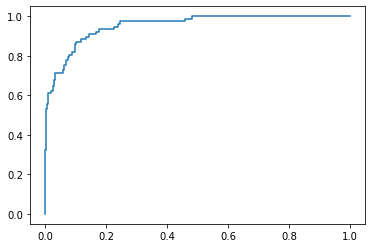

In [52]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y, pos_label=1)

plt.plot(fpr,tpr)

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

---

## 05.  로지스틱 회귀 분석(p-value 근거로 변수 2개 제거[Experience, Mortgage])

In [81]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan','Experience','Mortgage']))
X_data = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [82]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data,y, test_size=0.3, stratify=y)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1750, 10), (1750,), (750, 10), (750,))

In [83]:
model2 = sm.Logit(y_train2, X_train2)
result2 = model2.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.138091
         Iterations 9


In [84]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.5816
Time:                        14:41:28   Log-Likelihood:                -241.66
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                7.401e-139
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0186      0.010      1.790      0.073      -0.002       0.039
CCAvg                  0.1184      0.063      1.870      0.061      -0.006       0.243
CD Account             3.9108      0.543      7.199      0.000       2.846       4.976
CreditCard            -1.4012      0.367     -3.818      0.000      -2.120      -0.682
Education              1.5892      0.184      8.616      0.000       1.228       1.951
Family                 0.7559      0.121      6.222      0.000       0.518       0.994
Income                 0.0525      0.004     12.787      0.000       0.044       0.061
Online                -0.2338      0.255     -0.916      0.359      -0.734       0.266
Securities Account    -1.2632      0.481     -2.628      0.009      -2.205      -0.321
const                -13.8309      1.110    -12.461      0.000     -16.006     -11.655
======================================================================================
"""

#### 해석
- pvalue 전체적으로 약간 다 낮아졌음.
- 하지만 변동은 크지 않기에, 두 변수가 다른 변수랑 중첩크지 않았고, 영향도 크지 않았음

In [93]:
pred_y2 = result2.predict(X_test2)
pred_Y2 = cut_off(pred_y2,0.5)

In [94]:
cfmat = confusion_matrix(y_test2, pred_Y2)
print(acc(cfmat))

0.9613333333333334


In [95]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y2 = cut_off(pred_y2,i)
    cfmat = confusion_matrix(y_test2, pred_Y2)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.897333
0.2,0.928000
0.3,0.944000
0.4,0.956000
0.5,0.961333
0.6,0.962667
0.7,0.957333
0.8,0.949333


AUC: 0.950676366723915


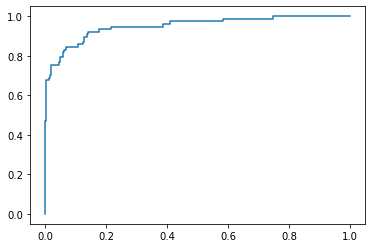

In [96]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_y2, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


---

## 06. 로지스틱 회귀 분석(변수선택법 이용 (R))

In [55]:
# R에 전처리한 데이터 바로 적용시키기 위해 파일로 저장
ploan_processed.to_csv("ploan_processed.csv",index=False)

### Rstudio 코드
```r
# working directory 지정
setwd("C:/Users/rbtkd/ADP_codingbook/회귀분석")

# caret 불러오기
library(caret)

# 데이터 불러오기
ploan <- read.csv('./ploan_processed.csv')
head(ploan)

# 상수항 없애기
ploan$const <- NULL

# full.model 만들기 (로지스틱 회귀분석 : glm)
full.model <- glm(Personal.Loan ~ . , data = ploan, family = binomial())

# 단계적선택법 적용
stepwise.model <- step(full.model, direction = 'both')
formula(stepwise.model)
length(stepwise.model$model)
summary(stepwise.model)

# 단계적선택법 결과
> formula(stepwise.model)
Personal.Loan ~ Experience + Income + Family + CCAvg + Education + 
    Securities.Account + CD.Account + Online + CreditCard
> length(stepwise.model$model)
[1] 10
```

In [113]:
ploan_processed.columns

Index(['const', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [114]:
# 상수항(const) 추가한 columns 저장

stepwise_columns = ['Experience' , 'Income' , 'Family' , 'CCAvg' , 'Education' , 
    'Securities Account' , 'CD Account' , 'Online' , 'CreditCard' , 'const']

In [115]:
len(stepwise_columns)

10

In [116]:
X_data_stepwise = ploan_processed[stepwise_columns]
y = ploan_processed['Personal Loan']

In [117]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data_stepwise, y, test_size=0.3, stratify=y)
X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((1750, 10), (1750,), (750, 10), (750,))

In [118]:
stepwise_model = sm.Logit(y_train3, X_train3)
fitted_stepwise_model = stepwise_model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131351
         Iterations 9


In [119]:
fitted_stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Sat, 04 Sep 2021   Pseudo R-squ.:                  0.6021
Time:                        14:50:45   Log-Likelihood:                -229.86
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                6.296e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience             0.0115      0.011      1.041      0.298      -0.010       0.033
Income                 0.0557      0.004     12.688      0.000       0.047       0.064
Family                 0.8080      0.129      6.281      0.000       0.556       1.060
CCAvg                  0.1053      0.062      1.697      0.090      -0.016       0.227
Education              1.6818      0.193      8.705      0.000       1.303       2.060
Securities Account    -0.9696      0.495     -1.960      0.050      -1.939   -5.68e-05
CD Account             3.9082      0.552      7.075      0.000       2.825       4.991
Online                -0.3296      0.266     -1.241      0.215      -0.850       0.191
CreditCard            -1.1632      0.345     -3.369      0.001      -1.840      -0.486
const                -13.8738      1.026    -13.516      0.000     -15.886     -11.862
======================================================================================
"""

---

## 07. 세 모델 차이 분석

In [120]:
pred_y_full = results.predict(X_test)
pred_y2 = result2.predict(X_test2)
pred_y_stepwise = fitted_stepwise_model.predict(X_test3)

In [121]:
pred_Y_full = cut_off(pred_y_full, 0.5)
pred_Y2 = cut_off(pred_y2, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [122]:
cfmat_full = confusion_matrix(y_test, pred_Y_full)
cfmat_y2 = confusion_matrix(y_test2,pred_Y2)
cfmat_stepwise = confusion_matrix(y_test3, pred_Y_stepwise)

In [123]:
print(acc(cfmat_full))
print(acc(cfmat_y2))
print(acc(cfmat_stepwise))

0.944
0.9613333333333334
0.948


In [124]:
print(len(results.model.exog_names))
print(len(result2.model.exog_names))
print(len(fitted_stepwise_model.model.exog_names))

12
10
10


AUC: 0.9532042994152949


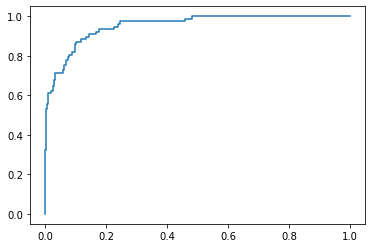

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_y_full, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.950676366723915


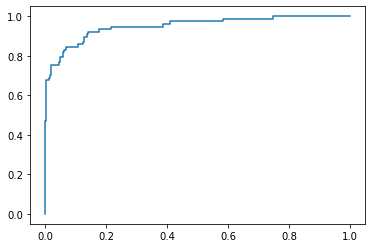

In [126]:
fpr, tpr, thresholds = metrics.roc_curve(y_test2, pred_y2, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9428995966886011


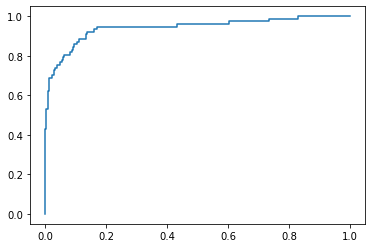

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_test3, pred_y_stepwise, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

### 최종해석
- 성능면에서 fullmodel과 변수선택법모델이 큰 차이가 없다.
- 따라서 2개 변수 제거한 모델을 선택해야 한다!